# 05 Interpolating Rasters

In case the digital elevation model of a simple geological map needs to be interpolated from topographic contours, several methods have been implemented into GemGIS. These include the methods ```nearest```, ```cubic``` and ```linear``` of ```scipy.interpolate.griddata``` and ```Rbf``` of ```scipy.interpolate.rbf```. The different methods can be accessed by passing the argument ```method= 'method_name'```. More information about the interpolation methods can be found [here](https://docs.scipy.org/doc/scipy/reference/interpolate.html).

<img src="../images/tutorial05_cover.png">

## Set File Paths

If you downloaded the latest `GemGIS` from the Github repository, append the path so that the package can be imported successfully. In addition, the file path to the files within the `gemgis_data` folder is set. You can download the data [here](https://github.com/cgre-aachen/gemgis_data/archive/master.zip) if you have not done so.

In [2]:
import sys
sys.path.append('../../../../gemgis')
file_path ='../../../../gemgis_data/data/05_interpolating_rasters/'

## Loading Data

In [3]:
import geopandas as gpd
import gemgis as gg

contours = gpd.read_file(file_path + 'topo.shp')

contours.head()

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


,id,Z,geometry
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77...."
1,None,300,"LINESTRING (645.965 0.525, 685.141 61.866, 724..."
2,None,400,"LINESTRING (490.292 0.525, 505.756 40.732, 519..."
3,None,600,"LINESTRING (911.433 1068.585, 908.856 1026.831..."
4,None,700,"LINESTRING (228.432 1068.585, 239.772 1017.037..."


## Plotting Data

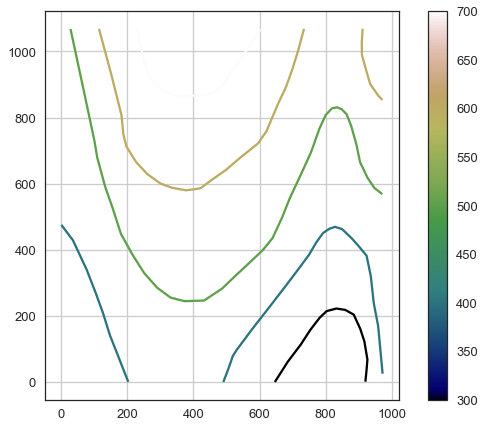

In [4]:
import matplotlib.pyplot as plt

contours.plot(aspect='equal',column='Z', cmap='gist_earth', legend=True)
plt.grid()

## Interpolating the Raster

It is recommended to use the method `rbf` for the interpolation of contour lines. More information about RBF can be found [here in this paper](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/JB076i008p01905).

In [9]:
raster = gg.vector.interpolate_raster(gdf=contours,
                                      method='rbf')
raster[:2]

array([[393.56371914, 393.50838517, 393.45386851, ..., 396.15856133,
        398.11421775, 400.06334288],
       [393.41982945, 393.36494645, 393.31088433, ..., 396.20694282,
        398.16690286, 400.12027997]])

## Plotting the interpolated raster

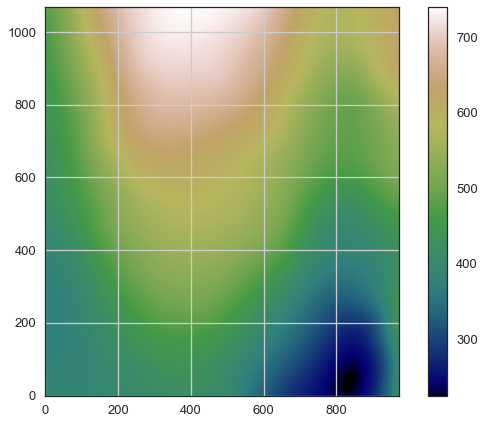

In [5]:
im = plt.imshow(raster, cmap='gist_earth', origin='lower')
plt.grid()
plt.colorbar(im)

## Interpolating the Raster

Using different interpolation functions such as `nearest` will result in different, more unrealistic results.

In [6]:
raster = gg.vector.interpolate_raster(gdf=contours,
                                      method='nearest')

## Plotting the interpolated raster

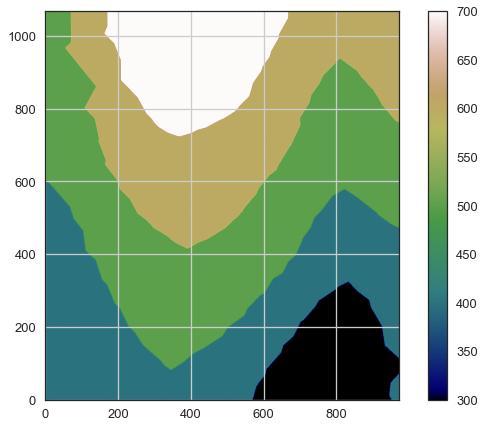

In [7]:
im = plt.imshow(raster, cmap='gist_earth', origin='lower')
plt.grid()
plt.colorbar(im)

## Additional Arguments

Several additional arguments can be passed to adapt the functionality of the function. For further reference, see the [API Reference for extract_xy](https://gemgis.readthedocs.io/en/latest/api_reference/vector_data.html).

* n - Number of points, default all
* res - Resolution of the interpolated raster, default 1
* extent - Extent of the interpolated raster, default according to the input data
* seed - seed for drawing random values
* kwargs - optional keyword arguments for rbf and griddata interpolation functions - https://docs.scipy.org/doc/scipy/reference/interpolate.html